# Predicting Heart Diease using Machine Learning

This notebooks Q

We are going to have following approach:
    1. Problem Defination
    2. Data
    3. Evaluation
    4. Features
    5. Modeling 
    6. Experimentaiton
    
## 1 Problem Defination

 > Given Clinical parameter about a patient, can we predict whether or not they have heart-disease ?
    
## 2. Data
 > Original Data came from UCI Machine Learning Kaggle 
 
## 3. Evaluation

>  if We can achieve 95% accuracy at predicting whether or not a patient has heart diaseas during the proof of concept,we will pursue project

## 4. Features

***Create a data Dictionary  

In [54]:
## Preparing Tools

# import all tools need

# Regular EDA ( Explolatory Data Analysis) and plotting libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want out plots to appreat inside notebook

%matplotlib inline 

# Models from Sklearn 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve


## Load Data

In [2]:
pwd

'/home/surani/jupyter'

In [3]:
df = pd.read_csv("data/heart-disease.csv")

df.shape

(303, 14)

## Data Explorations ( Exploratory Data Analysis)

The goal is to become subject matter expert on data

1. What questions are you trying to solve
2. What kind of data are available and how to we treat them differntly
3. what is missing from data and how do you deal with it ?
4. What are outliers and why should you care about it ?


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

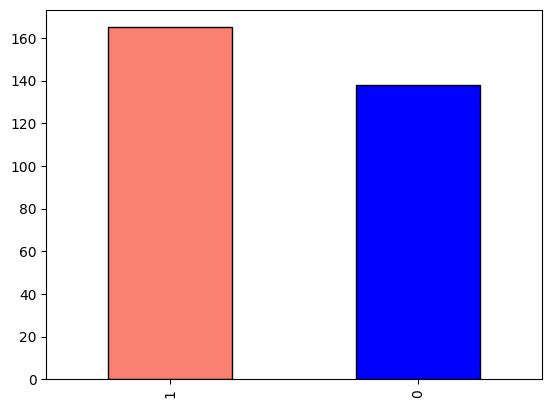

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","blue"],edgecolor="black");

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Heart Disease Frequency according Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
## Compare Target column with Sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


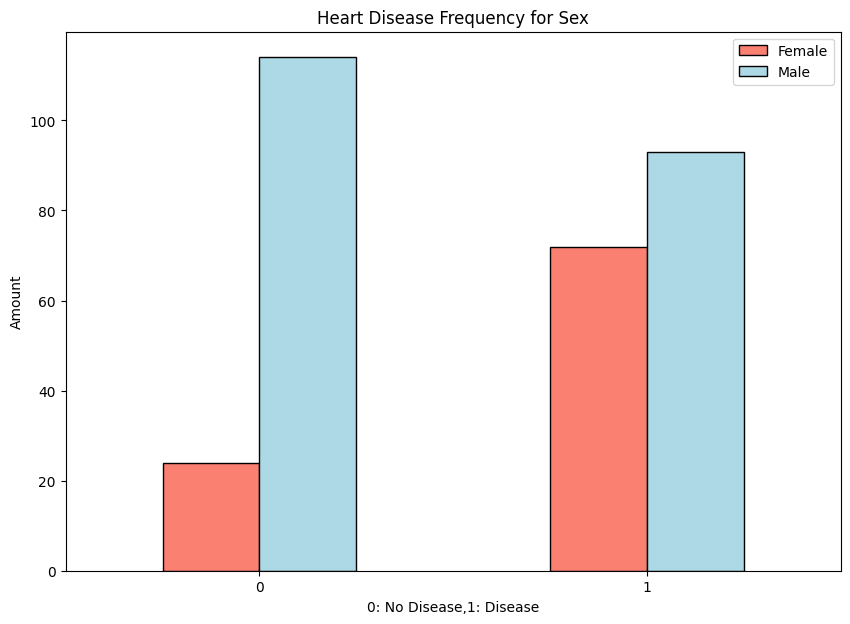

In [12]:
 # Create a plot of crosstab
    
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,7),
                                  color=["salmon","lightblue"],
                                  edgecolor="black");
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0: No Disease,1: Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

***Age vs Max Heart Rate for Heart Disease***

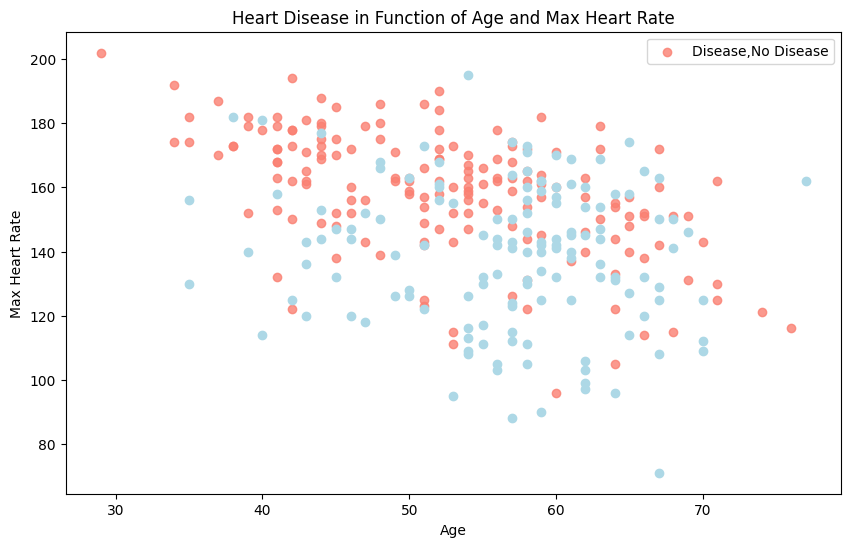

In [15]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon",
           alpha = 0.8);
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue",
           alpha = 1);

plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease,No Disease"]);

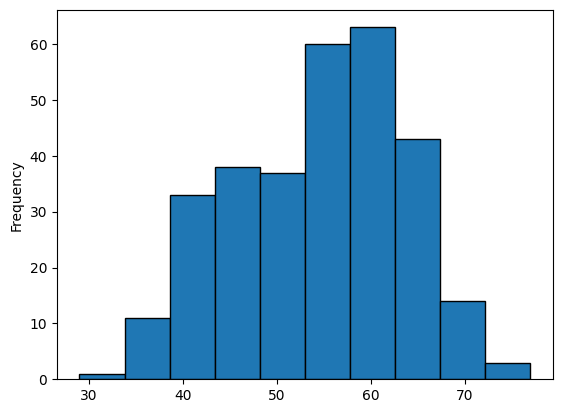

In [16]:
# Check the distribution of age with histogram

df.age.plot.hist(edgecolor="black");

### Heart Disease Frequency per Chest Pain 

cp = chest pain type 

    0: Typicaal angina
    1: Atypical Angina
    2: Non-Aginal Pain
    3: Asymtomatic
        

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


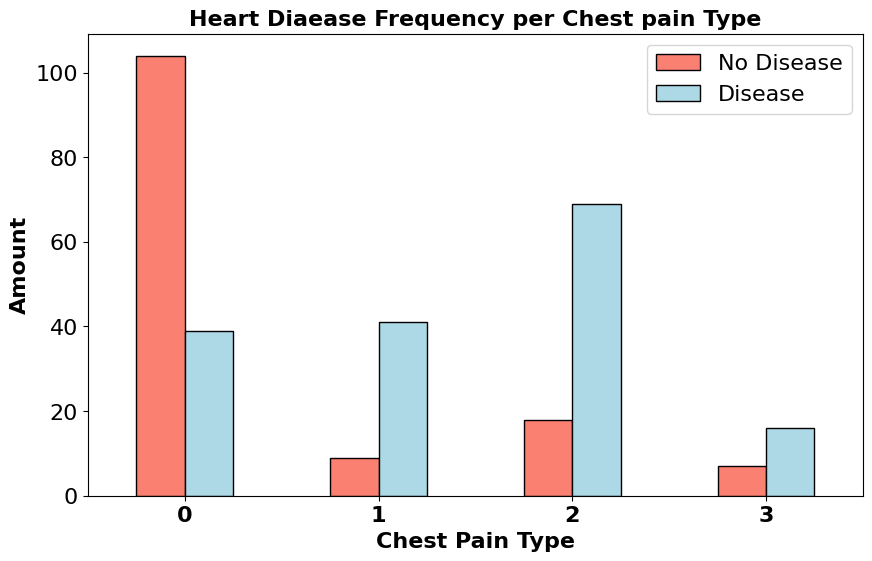

In [18]:
# Make crosstable more visual

pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(10,6),
                                 color=["salmon","lightblue"],
                                 edgecolor="black",
                                 fontsize=16)
plt.title("Heart Diaease Frequency per Chest pain Type",fontsize=16,
         fontweight="bold")
plt.xlabel("Chest Pain Type",fontsize=16,fontweight="bold")
plt.ylabel("Amount",fontsize=16,fontweight="bold")
plt.legend(["No Disease","Disease"],fontsize=16)
plt.xticks(rotation=0,fontsize=16,fontweight="bold");

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Build Coorelation Metrics 

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

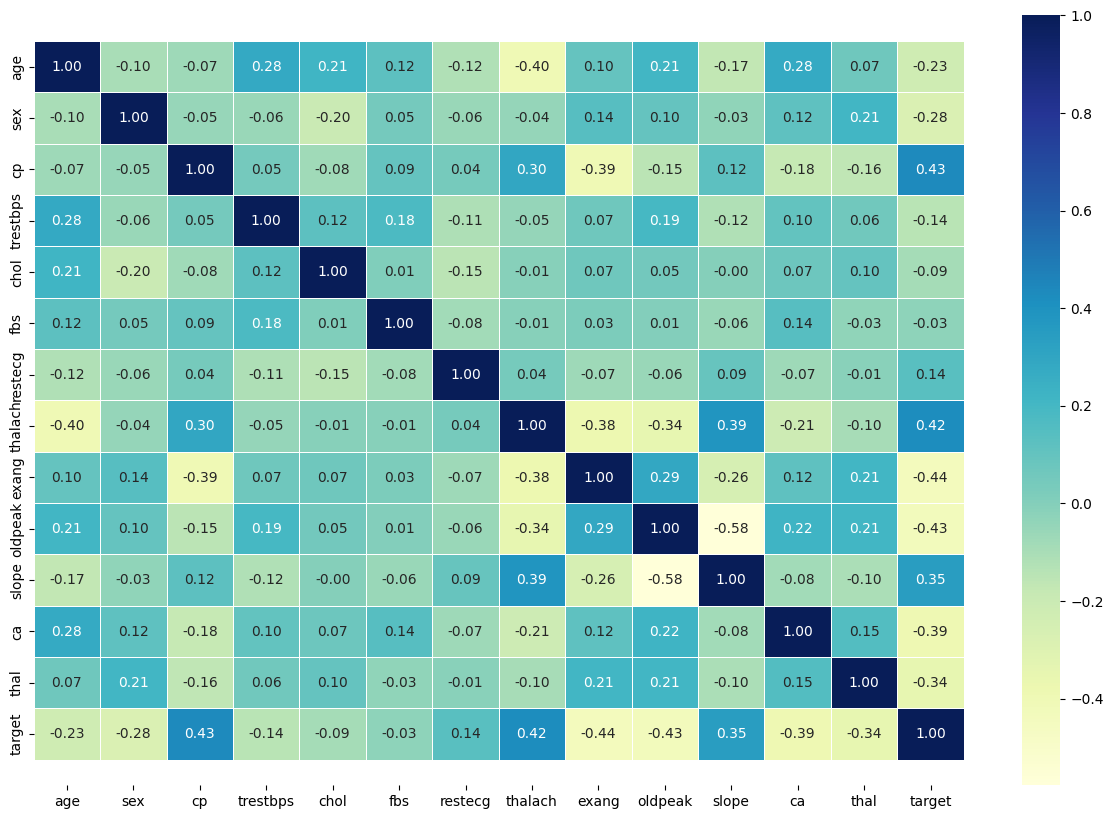

In [21]:
# Make Coorelation Matrics more visual

corr_matrix = df.corr()

fig, ax  = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                 cmap="YlGnBu"
                )
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modeling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data in to X and y

X = df.drop("target", axis=1)

y = df["target"]

In [24]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
# Split data into traininig and testing
np.random.seed(42)


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)



In [27]:

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

**Build Machine Learning Model:**
1. Logistic Regression
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier

In [29]:
# Put models in Dictionary

models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest Classifier": RandomForestClassifier()}

# Create Functions to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fit and Evaluate given machine learning models.
    models : a dict of different Sklearn Machine Learning Models
    X_train : Training Data no labels
    X_test : Testing Data no labels
    y_train : training label
    y_test : test label
    """
    
    #Set random seed
    np.random.seed(32)
    #Make Dictionary to keep model scores
    
    model_scores={}
    
    #Loop though Models
    for name, model in models.items():
        # Fit the models to data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model score
        model_scores[name]= model.score(X_test,y_test)
    return model_scores

In [30]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test= y_test)

model_scores

/home/surani/jupyter/environment/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8524590163934426}

## Model Comparison

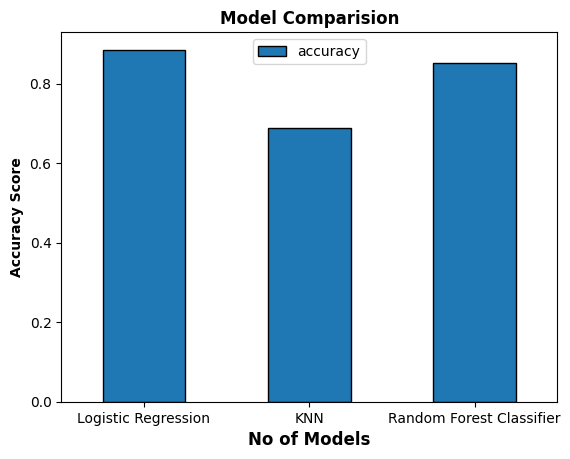

In [31]:
modal_compare = pd.DataFrame(model_scores,index=["accuracy"])
modal_compare.T.plot.bar(edgecolor="black")
plt.xticks(rotation=0)
plt.title("Model Comparision",fontweight="bold")
plt.xlabel("No of Models",fontsize=12,fontweight="bold")
plt.ylabel("Accuracy Score",fontweight="bold");

Now, we'have got a baseline model. Next, step...

* Hyper Parameter Tunning 
* Feature Importance
* Confusiion Metrics
* Cross Validation 
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under Curve (AUC)



## Hypterparameter Tunning ( By hand )



In [32]:
## lets Turn KNN


train_scores=[]
test_scores=[]

# Create a list for different values for n_neighbour


neighbours = range(1,23)

# Set up KNN Instance

KNN = KNeighborsClassifier()


# Loop thouogh differnt n_neighbour


for i in neighbours:
    KNN.set_params(n_neighbors=i)
    
    # Fit algorithm
    
    KNN.fit(X_train,y_train)
    
    #update training scores list
    train_scores.append(KNN.score(X_train,y_train))
    
    # update test score
    test_scores.append(KNN.score(X_test,y_test))
    


In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361]

Maximun KNN score on test data:75.41%


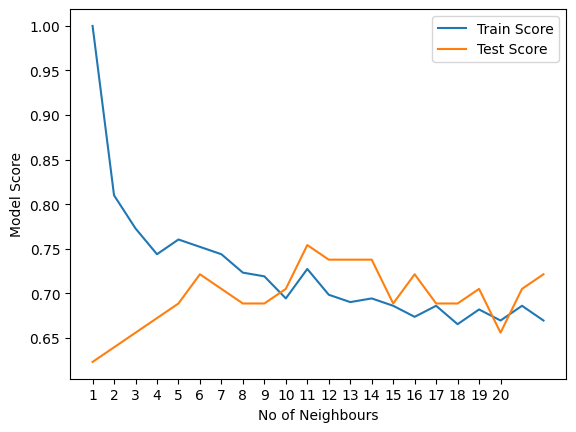

In [35]:
plt.plot(neighbours,train_scores,label = "Train Score")
plt.plot(neighbours,test_scores,label= "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of Neighbours")
plt.ylabel("Model Score")
plt.legend();

print(f"Maximun KNN score on test data:{max(test_scores)*100:.2f}%")

It shows that n_neighbour parameters is best at 11 with 75% accuracy. It is simply less than logistic regression. So, we will ignore KNN model


## Hyperparameter Tunning with RandomizedsearchCV

We are going to turn:

    * LogisticRegression()
    * RandomForesClassifier()
    
using RandomizedSearchCV

In [36]:
# Create a hyperparameter parameter grid for logistic regression

log_reg_grid= {
    "C":np.logspace(-4,4,20),
"solver":["liblinear"]}


# Create a Hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators":np.arange(10,1000,10),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
          }

Now, we got hypyer parameter grids of our models,  Lets turn threm using RandomizedSearchCV

In [37]:
## Tune Logistic Regression

np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                               )

# Fir Random HyperParameter search model for Logistic Regression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now, we have turned Logistic Regression ,  Let us do the same for RandomForestClassifier()

In [40]:
# Set up random Seed
np.random.seed(42)

# Set up Random Hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)


# Fir Random HyperParameter search for Model for RandomForestClassifier()

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [41]:
## Find best hyperparameters

rs_rf.best_estimator_

RandomForestClassifier(min_samples_leaf=15, min_samples_split=4,
                       n_estimators=610)

In [42]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': None}

In [43]:
# Evaluate the randomized search RandomForestClassifier model

rs_rf.score(X_test,y_test)

0.8688524590163934

In [44]:
# Let us compare existing model score

model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8524590163934426}

#### How to do Hyperparameter 

* By Hand ( Function)
* RandomizedSearchCv
* GridSearchCV

### Hyperparameter Tunning Using GridSearchCV

Since LogisticClassification Model provides best score, we will try and improve them using GridSearchCV

In [45]:
## Different Hyperparameter for Logistic Regression

log_reg_grid= {"C": np.logspace(-4,4,20),
              "solver": ["liblinear"],
              }

# Setup Grid hypermarameter search for Logistic Regression

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True
                         )

# Fit grid Hyperparameter seach model

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
# check best hyperparameter

gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [47]:
# Evaluate the Grid search LogisticRegression model

gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [48]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8524590163934426}

## Evaluate our tunned machine learning clarrifier beyond accuracy

* ROC Curve and AUR Curve
* Confusion Matrix 
* Classification Matrix
* Precision Matric
* Recall 
* F1 Score

and cross validation 

To make comparision and evaluate our trained model, first we need to make prediction.

In [49]:
## Make Prediction with tunned model
y_preds = gs_log_reg.predict(X_test)

y_preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [51]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [78]:
## Import ROC Curve function 

from sklearn.metrics import RocCurveDisplay

## Plot ROC Curve and calcuate aUR Metric

##RocCurveDisplay(gs_log_reg,X_test,y_test)

In [63]:
## Confusion Matrix

print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [69]:
import seaborn as sns

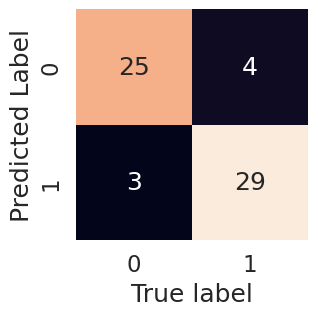

In [79]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar= False
                  )
    plt.xlabel("True label")
    plt.ylabel("Predicted Label")

    
plot_conf_mat(y_test,y_preds)
    

Let us take classification report and cross validated precision, recall and f1 score

In [80]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculation Evaluation Metric using Cross Validation



In [82]:
# check best hyper parameter

gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [83]:
## Create New classifier with best param

clf = LogisticRegression(C = 0.2335,solver="liblinear")

In [84]:
# Cross validated accuracy

cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [85]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [88]:
# Cross validated Precision

cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")

cv_precision= np.mean(cv_precision)
cv_precision

0.8215873015873015

In [89]:
# Cross validated Recall

cv_recall = cross_val_score(clf,
               X,
               y,
               cv=5,
               scoring="recall")

cv_recall= np.mean(cv_recall)
cv_recall

0.9272727272727274

In [90]:
# Cross validated F1 Score
cv_f1 = cross_val_score(clf,
               X,
               y,
               cv=5,
               scoring="f1")

cv_f1= np.mean(cv_f1)
cv_f1

0.8705403543192143

<Axes: title={'center': ' Cross Validated Classification Matricx'}>

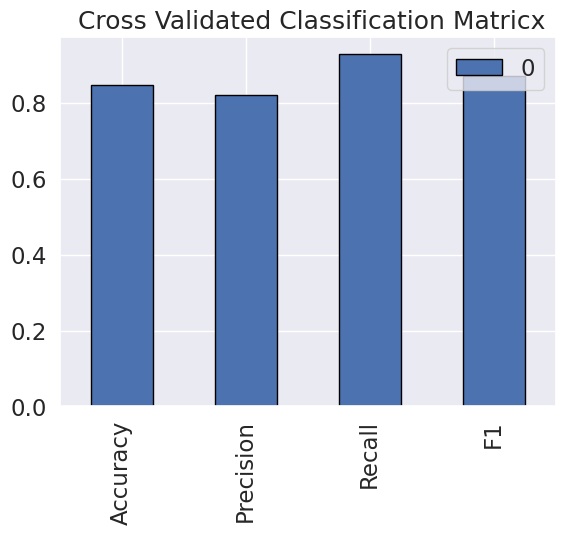

In [92]:
## Visualize cross validated mrtrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall" : cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(
    title=" Cross Validated Classification Matricx", edgecolor="black")

## Feature Important

Feature importance is another as asking Which features contributed most to outcomes of model and how did they contribute

In [93]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
## Fit an instance of Logistic Regression

clf = LogisticRegression(C=0.204335,
                        solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.204335, solver='liblinear')

In [95]:
## Chwck coef _

clf.coef_

array([[ 0.00316726, -0.86044487,  0.66066992, -0.01156993, -0.00166374,
         0.04386093,  0.31275772,  0.02459361, -0.6041298 , -0.56862781,
         0.45051555, -0.63609842, -0.67663302]])

In [96]:
# Match Coef's features to columns

feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672606566889253,
 'sex': -0.8604448677744261,
 'cp': 0.6606699161709855,
 'trestbps': -0.011569930425113359,
 'chol': -0.0016637430585715988,
 'fbs': 0.043860928960950396,
 'restecg': 0.3127577170359755,
 'thalach': 0.02459360875740716,
 'exang': -0.604129797828609,
 'oldpeak': -0.5686278133547888,
 'slope': 0.4505155525195747,
 'ca': -0.6360984189312022,
 'thal': -0.6766330190526313}

<Axes: title={'center': 'Feature Importance'}>

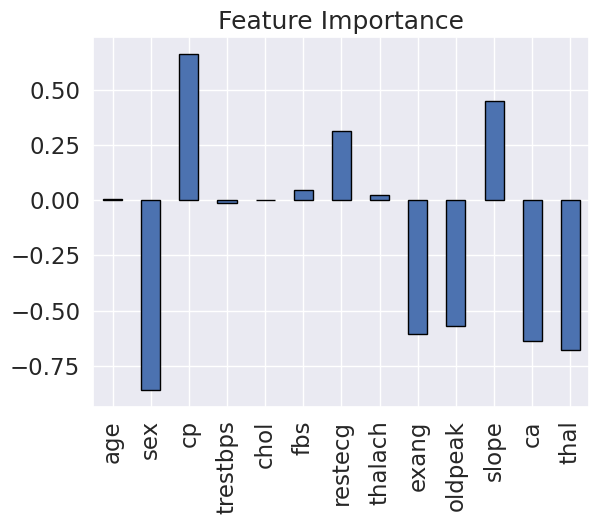

In [97]:
feature_df = pd.DataFrame(feature_dict,index=[0])

feature_df.T.plot.bar(title="Feature Importance", 
                      legend=False,
                      edgecolor="black")

In [98]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93
